# Red Wine Project

In [1]:
import warnings
warnings.simplefilter("ignore")
import joblib

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
from scipy.stats import zscore

from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
import lightgbm as lgb

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [2]:
df = pd.read_csv('winequality-red.csv')

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


# Exploratory Data Analysis (EDA)

In [5]:
df.shape

(1599, 12)

In [6]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [8]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


1)There is big gap b/w 75% and maxvalues of residualsugar
2)There is big gap b/w 75% and maxvalues of free sulfer dioxide
3)There is huge gap b/w 75% and maxvalues of total sulfer dioxide

All gaps indicates that there are outliers present in our dataset 


In [10]:
df.skew() # acceptable range +/-0.5

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
dtype: float64

Based on above skewness datasets information.Ignore quality since it is our target label.All the feature columns we can see that fixedacidity,volatile acidity,residual sugar,chloridees,freesulfurdioxide,totalsulferdioxide,density,sulphates,alchol are all outside the acceptable range of +/-0.5.Skewness indicates outliers being present in dataset

# Visualization

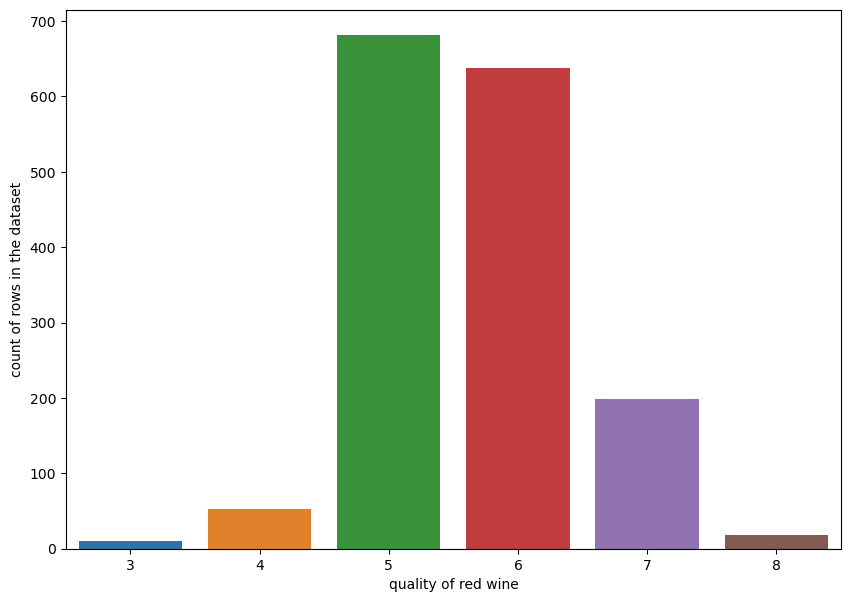

In [11]:
plt.figure(figsize=(10,7))
sns.countplot(x='quality',data=df)
plt.xlabel('quality of red wine')
plt.ylabel('count of rows in the dataset')
plt.show()

Countplot represent various categories of red wine quality.It shows 5 and 6 is higher than counterparts.This indicates an imbalanced which will need to rectified so that our machine learning model do not get biased to a certain value during prediction.

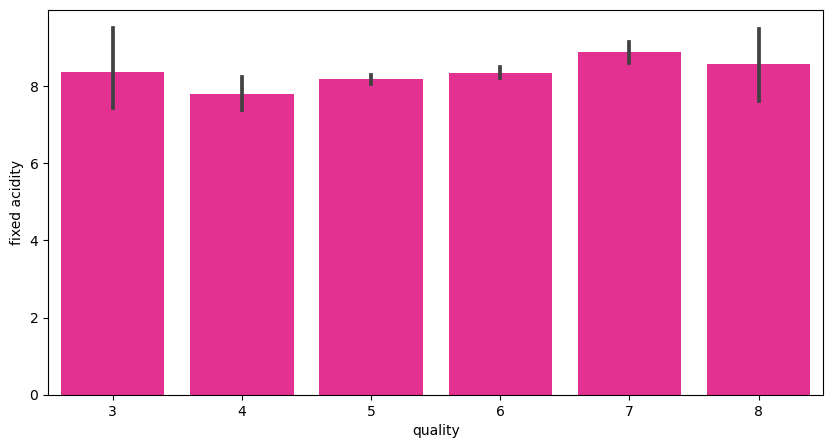

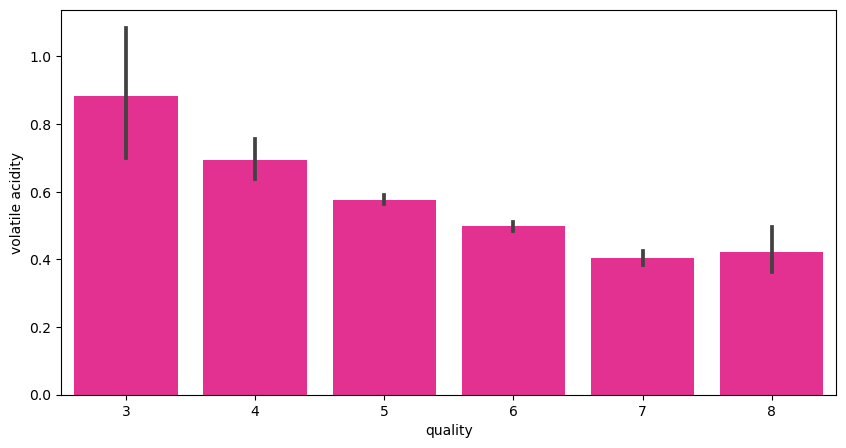

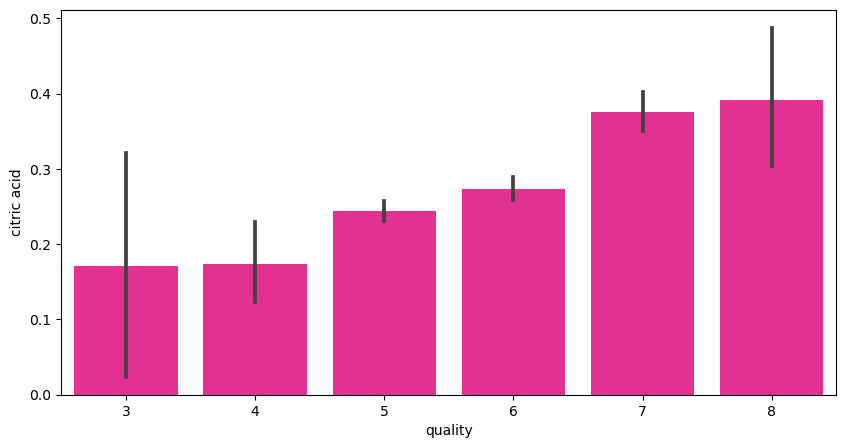

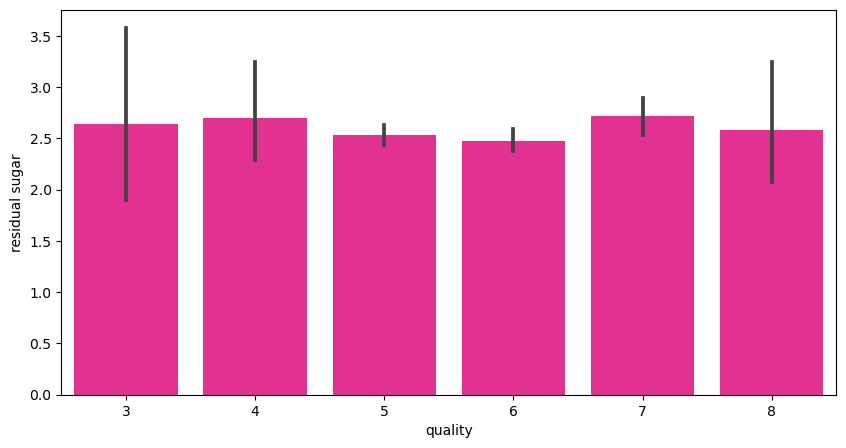

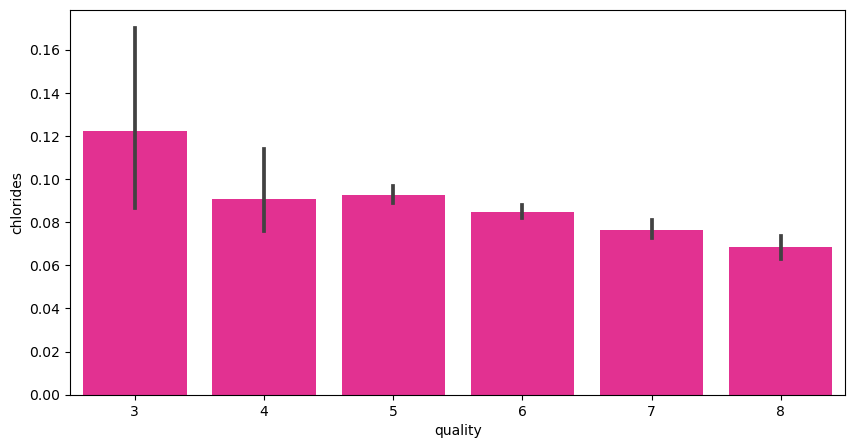

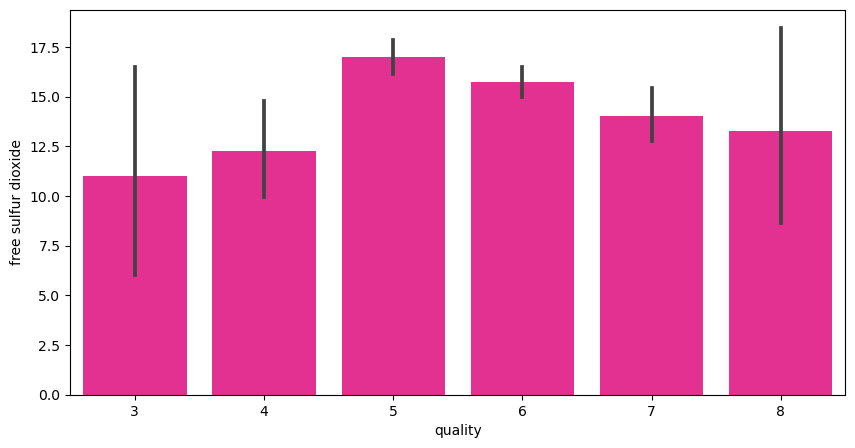

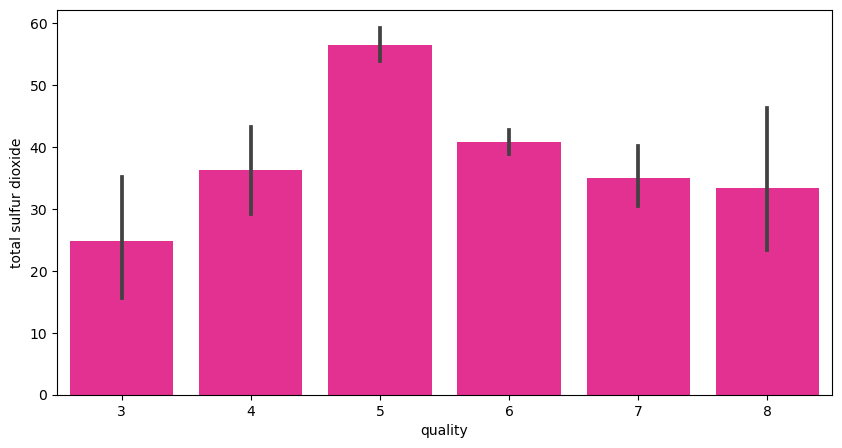

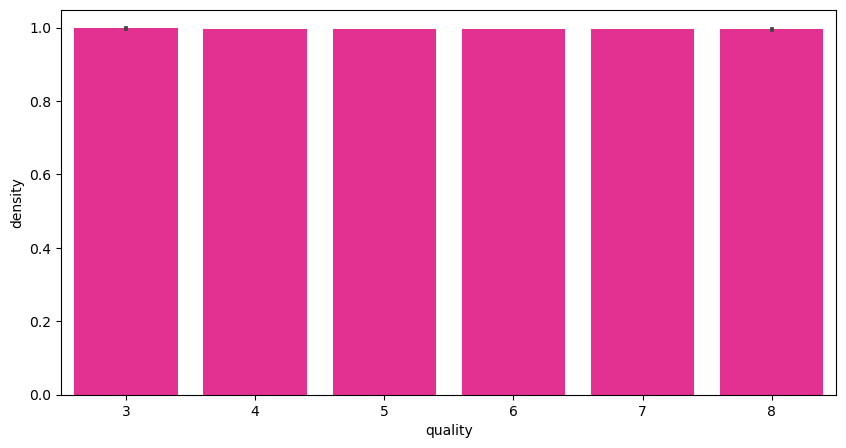

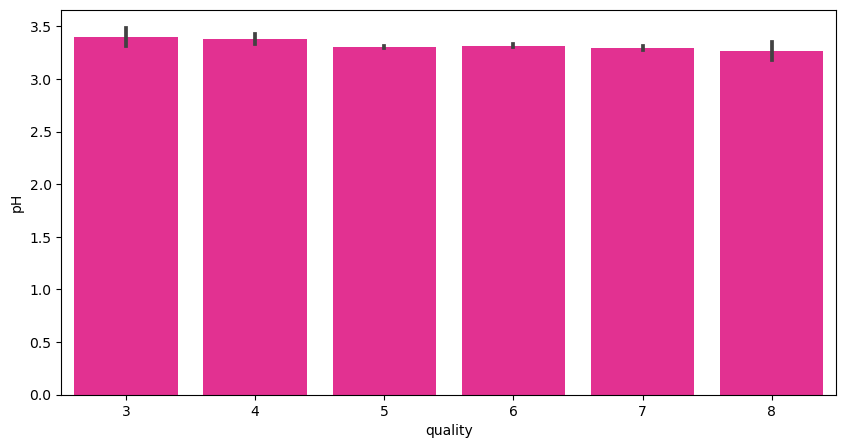

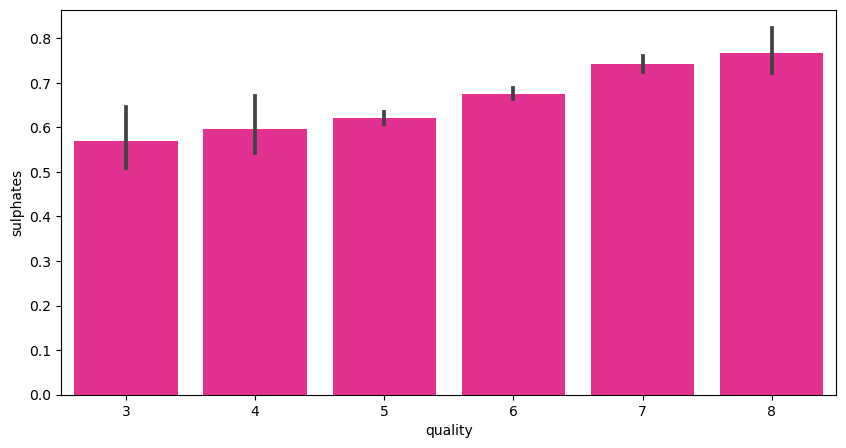

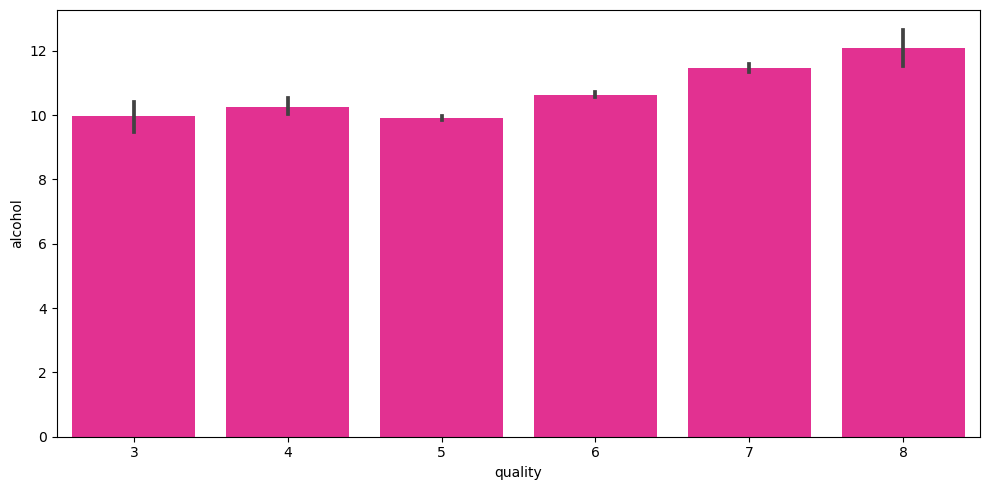

In [12]:
index=0
labels=df['quality']
features=df.drop('quality',axis=1)

for col in features.items():
    plt.figure(figsize=(10,5))
    sns.barplot(x=labels, y=col[index], data=df, color='deeppink')
plt.tight_layout()
plt.show()

Observations regarding feature compared to the label are:1.fixed acidity vs quality-no fixed pattern 2.volatile acidity vs quality-there is a decreasing trend 3.citric acid vs quality-there is an increasing trend 4.residual sugar vs quality-no fixed pattern 5.chlorides vs quality - there is decreasing trend 6.free sulfur dioxide vs quality-no fixed pattern as it is increasing and decreasing 7.total sulfur dioxide vs quality-no fixed pattern increasing and decreasing 8.density vs quality-no pattern at all 9.pH vs quality-no pattern at all 10.sulphates vs quality- there is an increasing trend 11.alchol vs quality-there is an increasing trend
    

so here we conclude that better quality wine citric acid,sulphates and alchol columns play a major role.

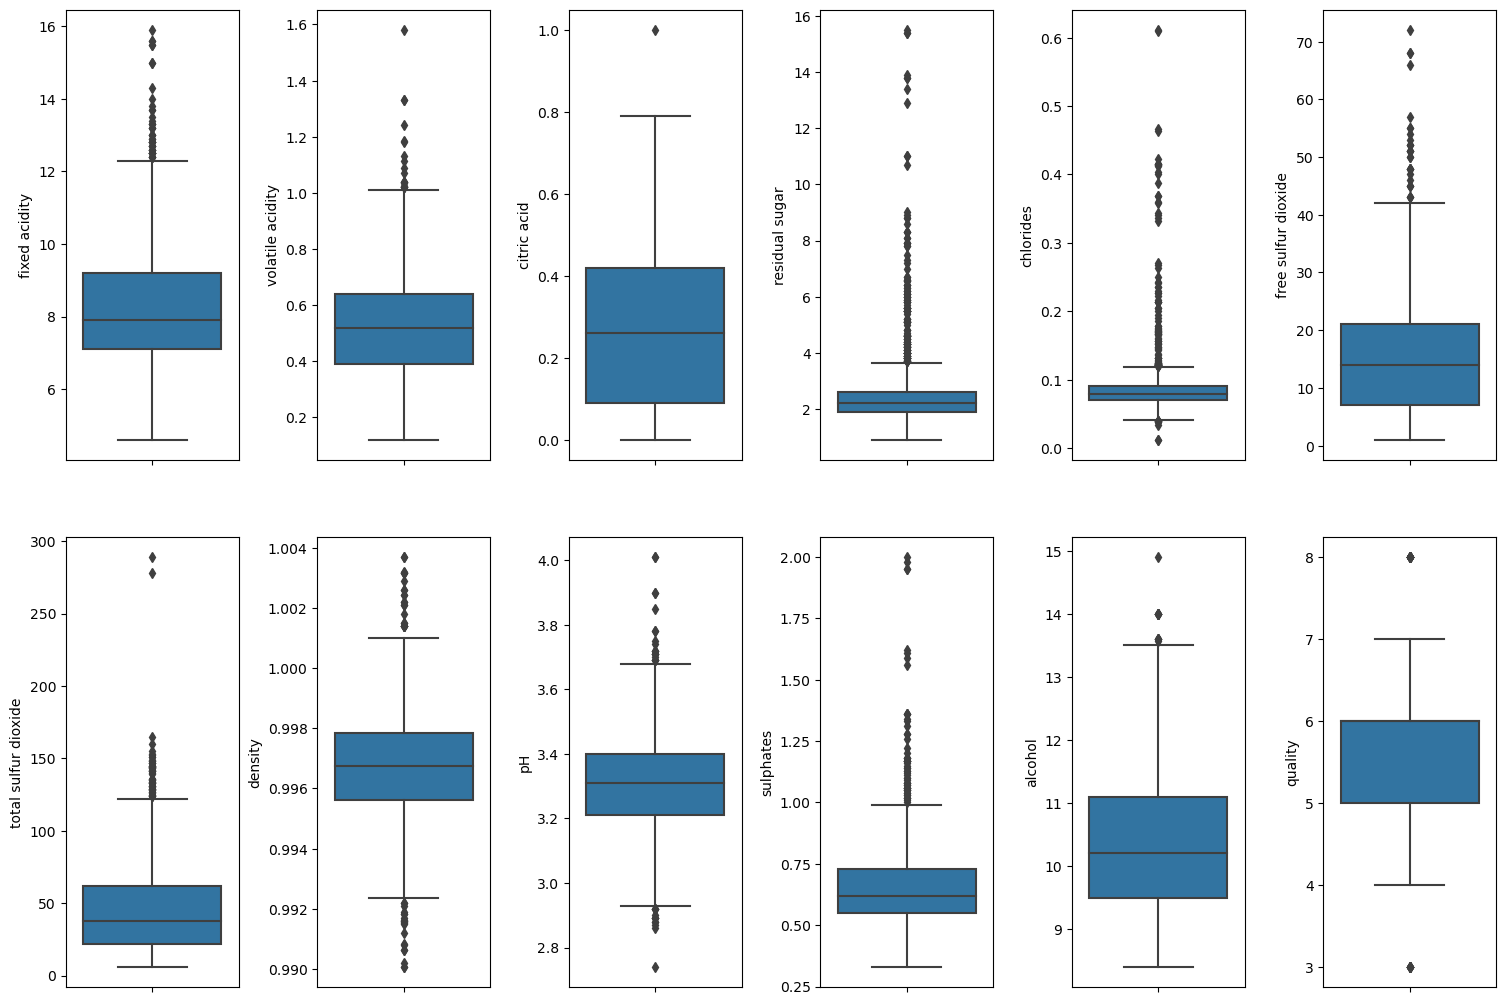

In [13]:
fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(15,10))
index=0
ax=ax.flatten()
for col, value in df.items():
    sns.boxplot(y=col, data=df, ax=ax[index])
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)
plt.show()

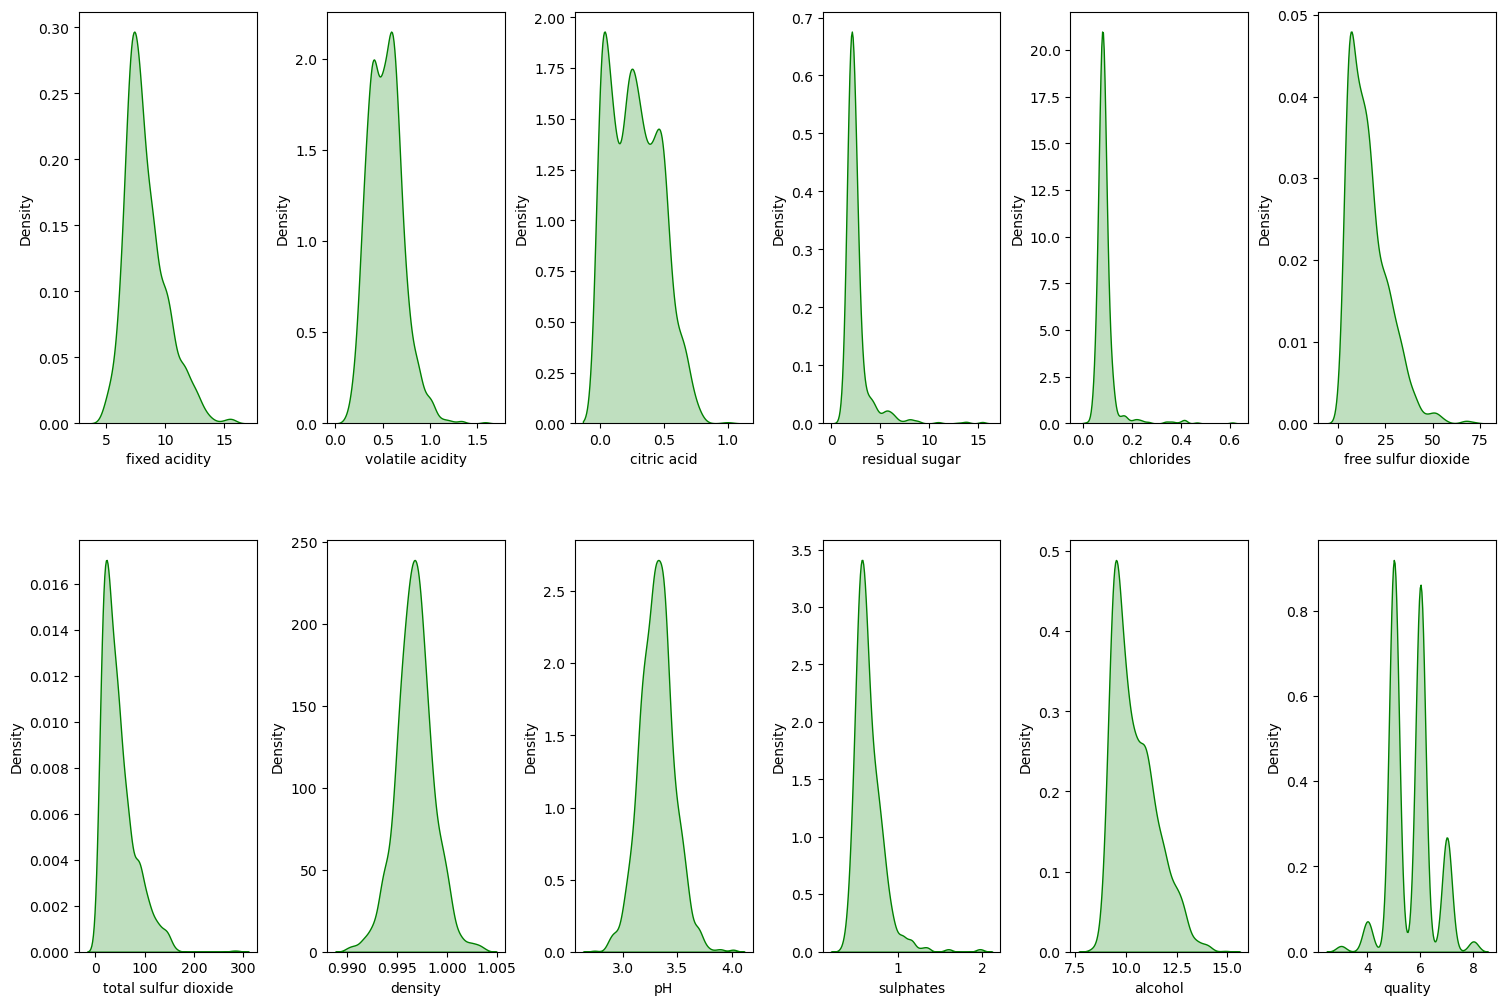

In [14]:
fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(15,10))
index=0
ax=ax.flatten()
for col, value in df.items():
    sns.distplot(value, ax=ax[index], hist=False, color="g" ,kde_kws={"shade":True})
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)
plt.show()

distribution plots show that few columns are in normal distribution category showing proper bell shape curve.

# Correlation using a Heatmap

postive correlation- A correlation of +1 indicates a perfect positive correlation, meaning that both variables move in the same direction together

negative correlation- A correlation of -1 indicates a negative positive correlation, meaning that as one variables in goes up, other goes down

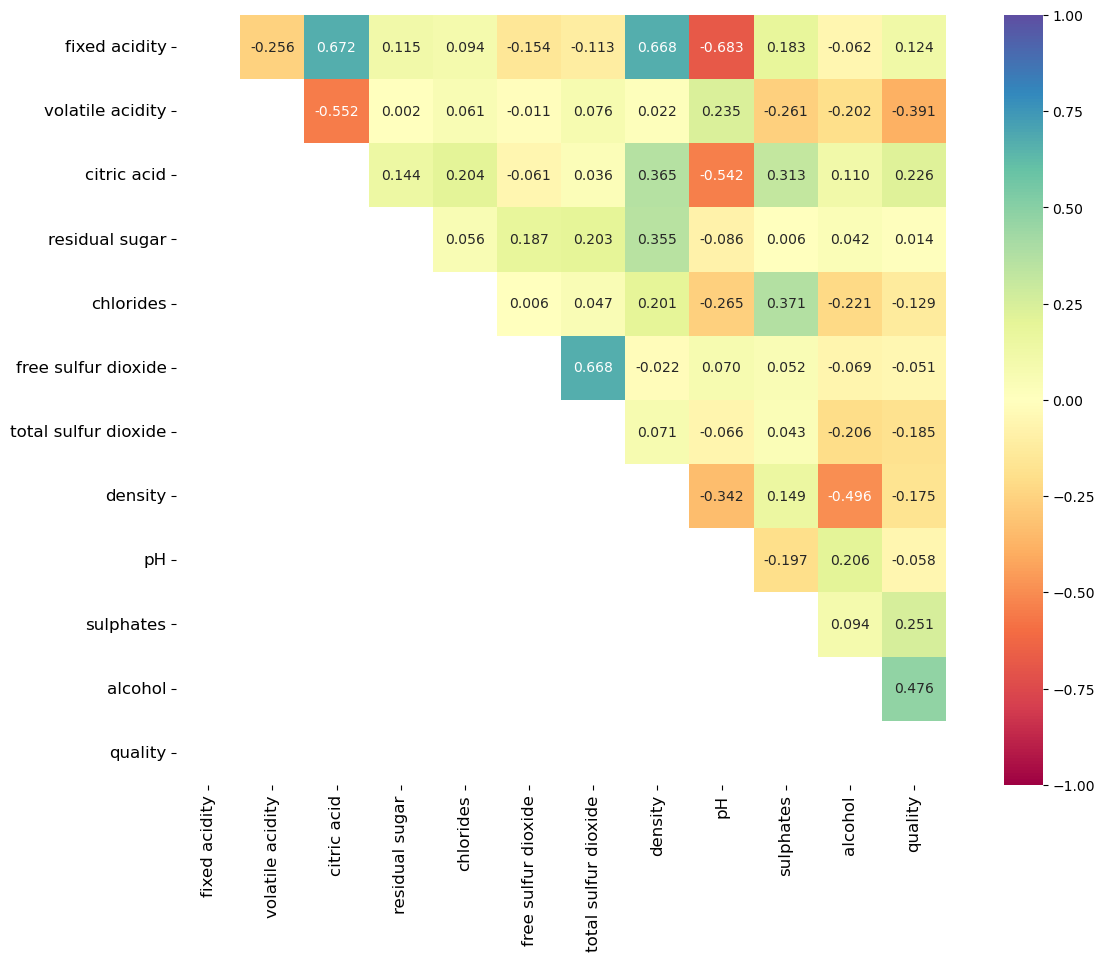

In [16]:
lower_triangle=np.tril(df.corr())
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f',
           annot_kws={'size':10},cmap='Spectral',mask=lower_triangle)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Dropping a column

In [17]:
df=df.drop('free sulfur dioxide', axis=1)
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,44.0,0.99547,3.57,0.71,10.2,5


# outlier removal

In [18]:
df.shape

(1599, 11)

confirming the number of columns and rows before removing the outlier from the dataset.

In [19]:
#zscore method
z=np.abs(zscore(df))
threshold=3
np.where(z>3)

df=df[(z<3).all(axis=1)]
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,44.0,0.99547,3.57,0.71,10.2,5


i have used the z score method to get rid of outlier present in dataset that are not in the acceptable range of +/-0.5 value of skewness.

In [20]:
df.shape

(1464, 11)

checking the no. of rows present in the dataset after applying the outlier removal technique

In [21]:
#percentage of data loss

data_loss=(1599-1464)/1599*100
#(1599 number of rows in original dataframe) and (1464 no. of rows after outlier removal)
data_loss

8.442776735459661

after removing the outliers we are checking the data loss percentage by comparing the rows in our original data set and the new data set post removal of the outlier

# Splitting the dataset into 2 variables namely 'X' and 'Y' for feature and label

In [23]:
X=df.drop('quality', axis=1)
Y=df['quality']

bifurcate the dataset into features and labels where X represents all the features columns and y represents the target label column.

# Taking care of class imbalance

In [24]:
Y.value_counts()

5    624
6    590
7    187
4     47
8     16
Name: quality, dtype: int64

this indicates class imbalance that we will need to fix by using the oversampling method.

In [25]:
#add samples to make all the categorical quality value same

oversample=SMOTE()
X, Y = oversample.fit_resample(X, y)

Smote is over sampling mechanism that we are using to ensure that all the categories present in our target label have the same value.

In [27]:
Y.value_counts()

5    624
6    624
7    624
4    624
8    624
Name: quality, dtype: int64

Sucessfully resolved the class imbalance problem now allthe categories have same data ensuring that the machine learning model doesnt get biased towards one category 

In [28]:
Y #display just label

0       5
1       5
2       5
3       6
4       5
       ..
3115    8
3116    8
3117    8
3118    8
3119    8
Name: quality, Length: 3120, dtype: int64

# Label Binarization

In [29]:
Y=Y.apply(lambda y_value:1 if y_value>=7 else 0)#1 is for good quality and 0 for bad (not good) quality 
Y #Displaying the label after applying label binarization

0       0
1       0
2       0
3       0
4       0
       ..
3115    1
3116    1
3117    1
3118    1
3119    1
Name: quality, Length: 3120, dtype: int64

using label binarization technique we have tagged the categories present in our target label to 2 major class that are 0 for bad quality wine and 1 for good quality wine.

In [30]:
X #Displaying all the features except the label

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.400000,0.700000,0.000000,1.900000,0.076000,34.000000,0.997800,3.510000,0.560000,9.400000
1,7.800000,0.880000,0.000000,2.600000,0.098000,67.000000,0.996800,3.200000,0.680000,9.800000
2,7.800000,0.760000,0.040000,2.300000,0.092000,54.000000,0.997000,3.260000,0.650000,9.800000
3,11.200000,0.280000,0.560000,1.900000,0.075000,60.000000,0.998000,3.160000,0.580000,9.800000
4,7.400000,0.700000,0.000000,1.900000,0.076000,34.000000,0.997800,3.510000,0.560000,9.400000
...,...,...,...,...,...,...,...,...,...,...
3115,7.611262,0.436054,0.316901,2.095767,0.074845,21.042329,0.993413,3.223099,0.708450,12.118292
3116,9.556228,0.369585,0.480990,3.548874,0.071760,14.859430,0.995753,3.217604,0.739425,12.538019
3117,9.330041,0.323320,0.546008,2.566802,0.077901,16.766802,0.995985,3.163992,0.866364,11.886559
3118,9.088467,0.401346,0.498462,1.806728,0.071048,16.009611,0.994598,3.209904,0.690288,12.505767


# Feature Scaling

In [43]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X #display all the features after applying scaling technique to avoid bias output

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.656140,1.065163,-1.521159,-0.632368,-0.131962,-0.103864,0.850451,1.462432,-0.801894,-1.264089
1,-0.405275,2.085321,-1.521159,0.155448,1.093777,1.154684,0.235829,-0.749951,0.101901,-0.901407
2,-0.405275,1.405215,-1.314657,-0.182187,0.759485,0.658893,0.358754,-0.321748,-0.124048,-0.901407
3,1.727078,-1.315206,1.369864,-0.632368,-0.187678,0.887719,0.973375,-1.035420,-0.651261,-0.901407
4,-0.656140,1.065163,-1.521159,-0.632368,-0.131962,-0.103864,0.850451,1.462432,-0.801894,-1.264089
...,...,...,...,...,...,...,...,...,...,...
3115,-0.523644,-0.430761,0.114856,-0.412041,-0.196311,-0.598041,-1.846168,-0.585100,0.316179,1.200600
3116,0.696166,-0.807480,0.961975,1.223359,-0.368174,-0.833843,-0.407700,-0.624318,0.549465,1.581169
3117,0.554309,-1.069689,1.297631,0.118085,-0.026035,-0.761100,-0.265144,-1.006931,1.505527,0.990487
3118,0.402803,-0.627475,1.052173,-0.737341,-0.407862,-0.789978,-1.117455,-0.679270,0.179389,1.551926


# Creating the training and testing data sets

In [32]:
X_train, X_test, Y_train, Y_test=train_test_split(X,Y, test_size=0.2, random_state=21)

# MI learning model for classification and evaluation metrics

In [33]:
#classification model function
def classify(model, X, Y):
    X_train, X_test, Y_train, Y_test=train_test_split(X, Y, test_size=0.2, random_state=21)
    
    #Training model
    model.fit(X_train, Y_train)
    
    #Prediction Y_test
    pred=model.predict(X_test)
    
    #Accuracy Score
    acc_score=(accuracy_score(Y_test, pred))*100
    print("Accuracy Score:", acc_score)
    
    #Classification report
    class_report=classification_report(Y_test, pred)
    print("\nClassification Report:\n", class_report)
    
    #Cross Validation Score
    cv_score=(cross_val_score(model, X, Y, cv=5).mean())*100
    print("Cross Validation Score:", cv_score)
    
    #resultof accuracy minus cv scores
    result=acc_score - cv_score
    print("\nAccuracy Score - Cross Validation score is", result)


In [34]:
#logistic Regression

model=LogisticRegression()
classify(model, X, Y)

Accuracy Score: 89.90384615384616

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.90      0.92       391
           1       0.84      0.90      0.87       233

    accuracy                           0.90       624
   macro avg       0.89      0.90      0.89       624
weighted avg       0.90      0.90      0.90       624

Cross Validation Score: 87.49999999999997

Accuracy Score - Cross Validation score is 2.403846153846189


Created the Logistic Regression Model and checked for it's evaluation metrics

In [35]:
#Support Vector Classifier
model=SVC(C=1.0, kernel='rbf', gamma='auto', random_state=42)
classify(model, X, Y)

Accuracy Score: 92.1474358974359

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.93      0.94       391
           1       0.88      0.91      0.90       233

    accuracy                           0.92       624
   macro avg       0.91      0.92      0.92       624
weighted avg       0.92      0.92      0.92       624

Cross Validation Score: 90.22435897435898

Accuracy Score - Cross Validation score is 1.9230769230769198


Created the Support Vector Classifier Model and checked for it's evaluation metrics

In [36]:
# Decision Tree Classifier

model=DecisionTreeClassifier(random_state=21, max_depth=15)
classify(model, X, Y)

Accuracy Score: 91.98717948717949

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.93      0.94       391
           1       0.89      0.90      0.89       233

    accuracy                           0.92       624
   macro avg       0.91      0.92      0.91       624
weighted avg       0.92      0.92      0.92       624

Cross Validation Score: 87.98076923076923

Accuracy Score - Cross Validation score is 4.006410256410263


Created the Decision Tree Classifier Model and checked for it's evaluation metrics

In [37]:
#random forest classifier
model=RandomForestClassifier(max_depth=15, random_state=111)
classify(model, X, Y)

Accuracy Score: 94.55128205128204

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.95      0.96       391
           1       0.92      0.94      0.93       233

    accuracy                           0.95       624
   macro avg       0.94      0.94      0.94       624
weighted avg       0.95      0.95      0.95       624

Cross Validation Score: 92.17948717948717

Accuracy Score - Cross Validation score is 2.371794871794876


Created the Random Forest Classifier Model and checked for it's evaluation metrics

In [39]:
#K neighbors classifier

model=KNeighborsClassifier(n_neighbors=15)
classify(model, X, Y)

Accuracy Score: 91.34615384615384

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.91      0.93       391
           1       0.85      0.93      0.89       233

    accuracy                           0.91       624
   macro avg       0.90      0.92      0.91       624
weighted avg       0.92      0.91      0.91       624

Cross Validation Score: 87.94871794871796

Accuracy Score - Cross Validation score is 3.3974358974358836


Created the K Neighbors Classifier Model and checked for it's evaluation metrics

In [40]:
#Extra Trees Classifier

model=ExtraTreesClassifier()
classify(model, X, Y)

Accuracy Score: 95.3525641025641

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.96      0.96       391
           1       0.93      0.94      0.94       233

    accuracy                           0.95       624
   macro avg       0.95      0.95      0.95       624
weighted avg       0.95      0.95      0.95       624

Cross Validation Score: 93.14102564102565

Accuracy Score - Cross Validation score is 2.211538461538453


Created the Extra Tree Classifier Model and checked for it's evaluation metrics

In [41]:
#XGB Classifier

model=xgb.XGBClassifier(verbosity=0)
classify(model, X, Y)


Accuracy Score: 95.83333333333334

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.96      0.97       391
           1       0.94      0.95      0.94       233

    accuracy                           0.96       624
   macro avg       0.95      0.96      0.96       624
weighted avg       0.96      0.96      0.96       624

Cross Validation Score: 91.92307692307693

Accuracy Score - Cross Validation score is 3.910256410256409


Created the XGB  Classifier Model and checked for it's evaluation metrics

In [44]:
#LGBM Classifier
model=lgb.LGBMClassifier()
classify(model, X, Y)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1015, number of negative: 1481
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000386 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2550
[LightGBM] [Info] Number of data points in the train set: 2496, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.406651 -> initscore=-0.377829
[LightGBM] [Info] Start training from score -0.377829
Accuracy Score: 95.1923076923077

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.96      0.96       391
           1       0.93      0.94      0.94       233

    accuracy                           0.95       624
   macro avg       0.95      0.95      0.95       624
weighted avg       0.95      0.95      0.95       624

[LightGBM] [Warning] Found whitespace in 

# Hyper Parameter tuning on the best ML Model

In [45]:
#choosing support vector Classifier

svc_param={'kernel':['poly', 'sigmoid', 'rbf'],
          'gamma':['scale', 'auto'],
          'shrinking':[True,False],
          'random_state':[21,42,104],
          'probability':[True,False],
          'decision_function_shape':['ovo', 'ovr'],
          'verbose':[True,False]}

After all the classification model selected svc as best model 

In [46]:
GSCV=GridSearchCV(SVC(), svc_param, cv=5)

GridsearchCv method for hyper parameter tuning best model

In [47]:
GSCV.fit(X_train,Y_train)

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'decision_function_shape': ['ovo', 'ovr'],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['poly', 'sigmoid', 'rbf'],
                         'probability': [True, False],
                         'random_state': [21, 42, 104],
                         'shrinking': [True, False], 'verbose': [True, False]})

In [48]:
GSCV.best_params_

{'decision_function_shape': 'ovo',
 'gamma': 'scale',
 'kernel': 'rbf',
 'probability': True,
 'random_state': 21,
 'shrinking': True,
 'verbose': True}

In [50]:
Final_Model = SVC(decision_function_shape='ovo',gamma='scale',kernel='rbf',probability=True, random_state=21,
                  shrinking=True,verbose=True)
Classifier=Final_Model.fit(X_train, Y_train)
fmod_pred=Final_Model.predict(X_test)
fmod_acc=(accuracy_score(Y_test, fmod_pred))*100
print("Accuracy score for the Best model is:", fmod_acc)


[LibSVM]Accuracy score for the Best model is: 92.1474358974359


# Auc Roc Curve

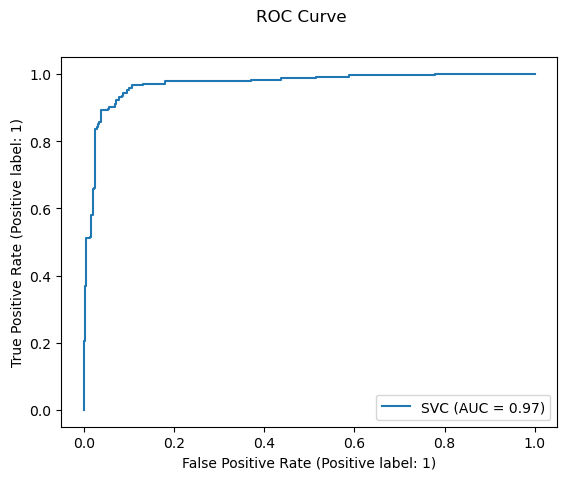

In [51]:
disp=metrics.plot_roc_curve(Final_Model, X_test, Y_test)
disp.figure_.suptitle("ROC Curve")
plt.show()

# Confusion Matrix

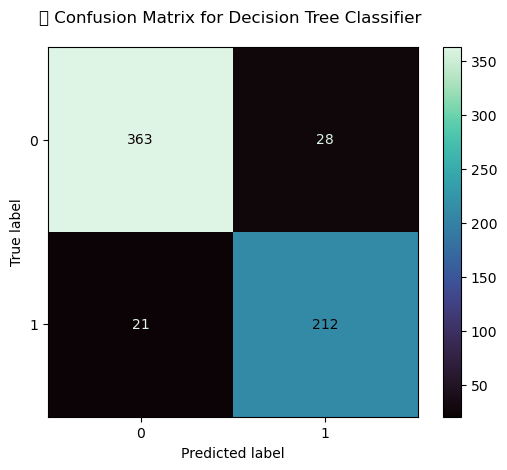

In [52]:
class_names=df.columns
metrics.plot_confusion_matrix(Classifier, X_test, Y_test, cmap='mako')
plt.title('\t Confusion Matrix for Decision Tree Classifier \n')
plt.show()

# Saving the Model

In [53]:
filename = "FinalModel_123"
joblib.dump(Final_Model, filename)

['FinalModel_123']

# Medical Cost Personal Insurance Project

In [56]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.metrics import classification_report, mean_squared_error,mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import MinMaxScaler

In [57]:
data = pd.read_csv("medical_cost_insurance.csv")

In [58]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [59]:
data.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [60]:
data.shape

(1338, 7)

In [61]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


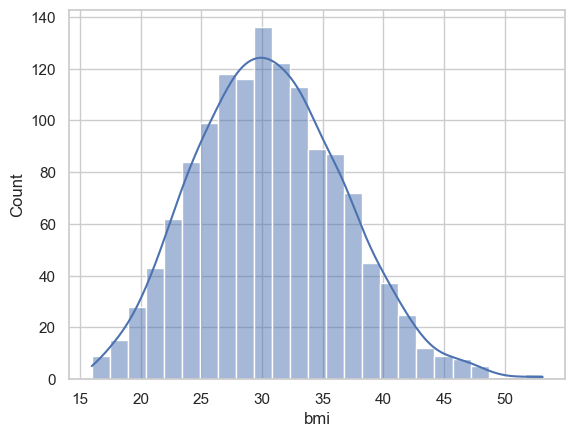

In [62]:
# Distribution of BMI with respect to charges by scatter plot.
distribution_bmi=sns.set(style="whitegrid")
distribution_bmi=sns.histplot(data=data, x="bmi", kde=True)

In [63]:
#check is there any null data.
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [64]:
#observed that no empty data in the dataset

Outlier Detection

Outlier is a data point that significantly far from other data points in the dataset.

In order to find the outliers,IQR(Inter-quartile Range)Rule is used.

1) IQR=Q3-Q1
2) Q3:Percentile75
3) Q1:Percentile25
4) Lower Boundary:The minimum value data points
5) Lower Boundary:Q1-1.5*IQR
6) Upper Boundary:The maximum value data points
7) Upper Boundary:Q3+1.5*IQR
    
Data points that are not in range that is specified by lower boundary and upper boundary are called as *Outlier*.

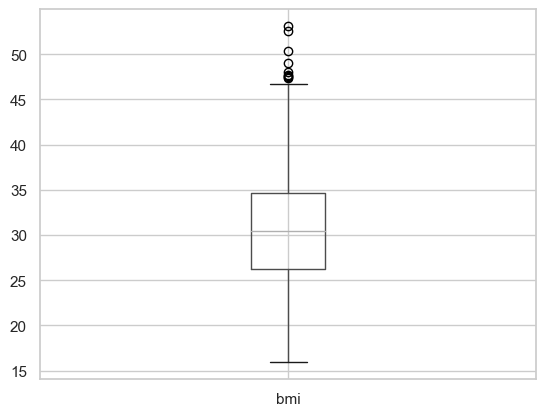

In [65]:
#check is there any outlier in the bmi.
data.boxplot(column=['bmi']);

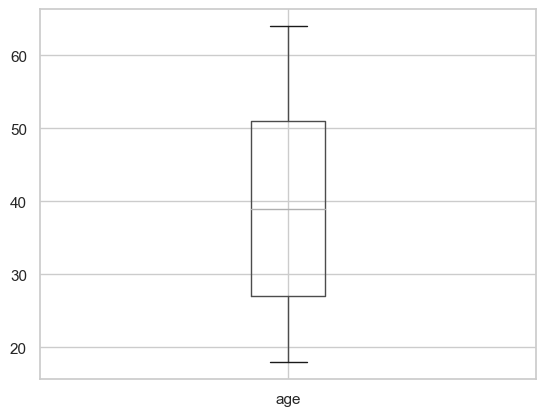

In [66]:
#check is there any outlier in the age.
data.boxplot(column=['age']);

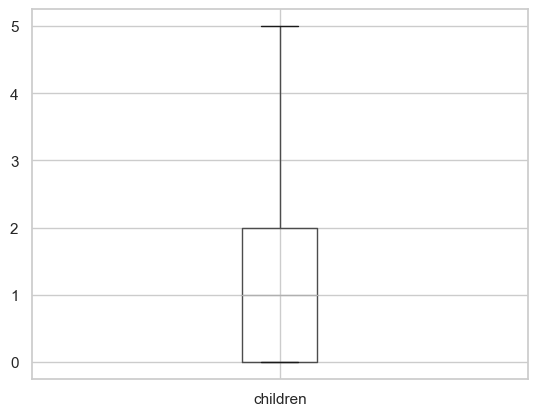

In [67]:
#check is there any outlier in the children.
data.boxplot(column=['children']);

# Remove Outliers

In [71]:
#Define Q1 and Q3 by using 25% and 75% Quantiles.
Q1= data['bmi'].quantile(0.25)
Q3= data['bmi'].quantile(0.75)
#Define IQR as the difference of Q3 and Q1
IQR=Q3-Q1
#Define Lower Boundary and Upper Boundary
lower_boundary=Q1-1.5*IQR
upper_boundary=Q3+1.5*IQR

In [72]:
# In order to find the index of outliers, define a list
# This list contains row numbers of outliers
outliers_list = data.index[ (data["bmi"] < lower_boundary) | (data["bmi"] > upper_boundary) ]
#Create an empty list that stores indices of outliers
outliers_index=[]
outliers_index.extend(outliers_list)

In [73]:
#Indices of outliers
outliers_index

[116, 286, 401, 543, 847, 860, 1047, 1088, 1317]

In [74]:
#It is observed that there are 9 outliers in the bmi features.

In [75]:
#create a new dataset that is cleaned from rows of outliers.
outliers_index = sorted(set(outliers_index))
data_cleaned = data.drop(outliers_index)

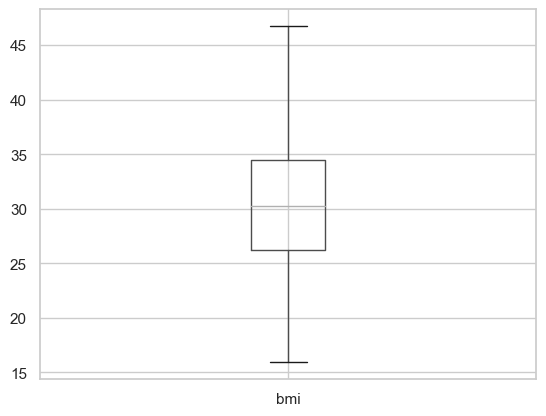

In [76]:
#New dataset has no outliers.
data_cleaned.boxplot(column=['bmi']);

In [77]:
data_cleaned.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [78]:
#9 rows belong to outlier are removed from the dataset
data_cleaned.shape

(1329, 7)

In [1]:
#Show_corr function that results a barplot.
#Shows Correlation from highest to lowest.
def show_corr(dataset, target_name, n_most=None):
    if n_most is None:
        n_most=len(dataset.columns.values)-1
    corr_matrix=dataset.corr().abs()
    
    most_correlated_features=corr_matrix[target_name].sort_values(ascending=False).drop(target_name)
    most_correlated_feature_names=most_correlated_features.index.values
    
    fig, ax=plt.subplots(figsize=(15,5))
    plt.xticks(rotation="90")
    sns.barplot(x=most_correlated_feature_names, y=most_correlated_features)
    plt.title("Correlation of features with {}".format(target_name))

Correlation Graphs

Correlation Graph Of:
    
1.Smoker and charges
2.Smoker and region
3.BMI and Sex
4.Age and BMI
5.BMI and Children
6.BMI and Charges

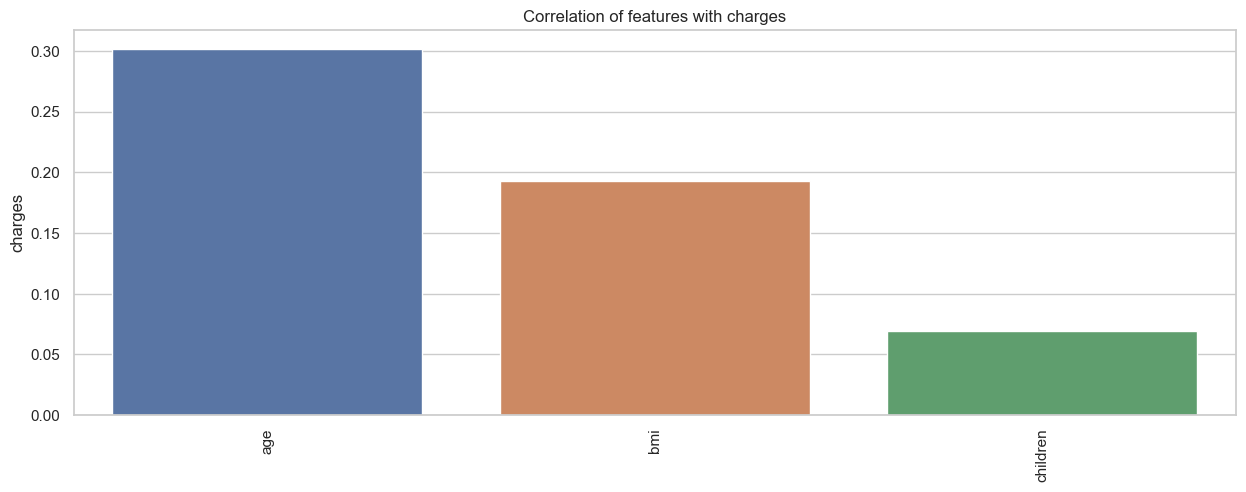

In [80]:
#correlation of all features when charges feature is target
show_corr(dataset=data_cleaned, target_name='charges')

In [81]:
#New dataset with cleaned from outliers is created as .csv file
data_cleaned.to_csv("insurance_cleaned.csv", index=False)

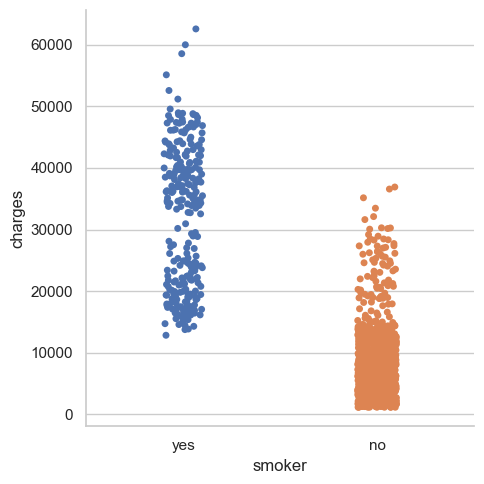

In [82]:
#Correlation between smoker and charges.
corr_smoker_charges=sns.catplot(x="smoker", y="charges", data=data_cleaned)

In [84]:
#Correlation between region and smoker.
corr_region_smoker = data_cleaned.groupby(["region", "smoker"]).size().reset_index(name="Numb")
corr_region_smoker

,region,smoker,Numb
0,northeast,no,256
1,northeast,yes,67
2,northwest,no,267
3,northwest,yes,58
4,southeast,no,268
5,southeast,yes,89
6,southwest,no,267
7,southwest,yes,57


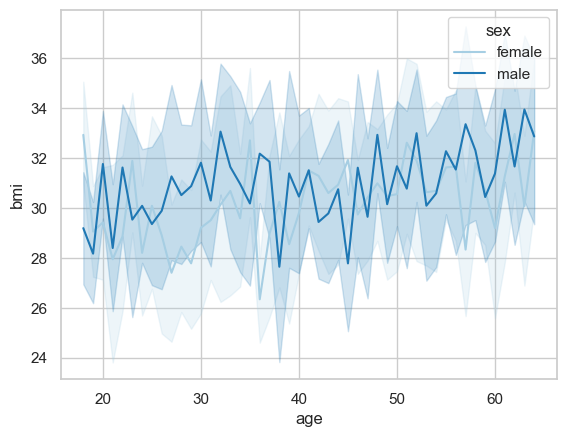

In [85]:
#correlation b/w bmi and sex.
corr_bmi_sex=sns.lineplot(x="age",y="bmi",hue="sex",data=data_cleaned,palette="Paired")

In [86]:
#no. of childrens for each region.
num_children=data_cleaned.groupby("region")["children"].sum()
num_children

region
northeast    337
northwest    373
southeast    378
southwest    369
Name: children, dtype: int64

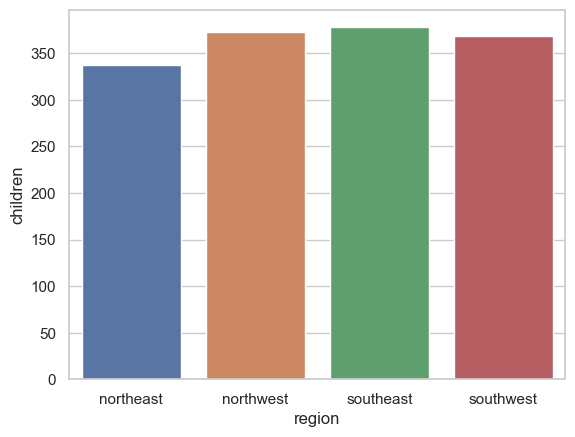

In [87]:
#create a bar plot that show no. of chlidrens with respect regions
num_children_bar=sns.barplot(x= num_children.index, y=num_children)

Southeast is the region with the most children.

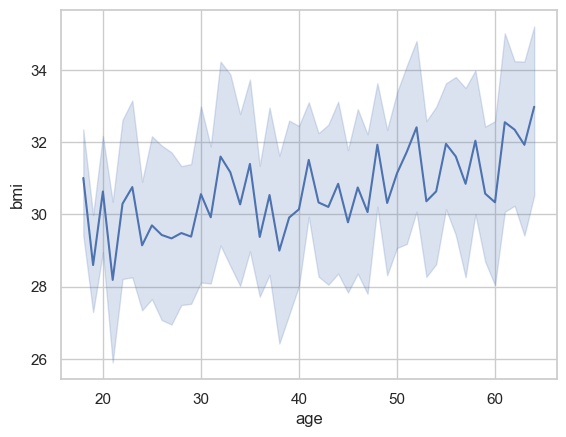

In [88]:
#Correlation b/w age and bmi.
corr_age_bmi=sns.lineplot(x="age",y="bmi",data=data_cleaned)

In [90]:
#Correlation b/w bmi and children
corr_bmi_children=data_cleaned.groupby(["children"])["bmi"].describe()
corr_bmi_children

,count,mean,std,min,25%,50%,75%,max
children,,,,,,,,
0,571.0,30.448809,5.887124,15.960,26.12500,30.3000,34.550,46.20
1,320.0,30.386500,5.752371,16.815,26.55250,29.9225,34.200,46.53
2,238.0,30.836450,6.349372,16.815,25.75875,31.4500,35.275,46.70
3,157.0,30.684331,5.787173,18.905,27.26500,30.4950,34.320,46.53
4,25.0,31.391200,4.627211,24.415,28.21500,29.6400,33.660,41.47
5,18.0,29.605000,7.139686,18.300,24.30250,28.5500,33.055,46.75


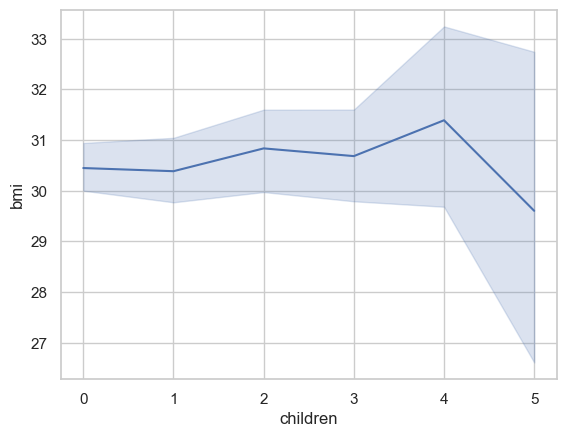

In [91]:
#line plot of bmi vs children.
line_bmi_children=sns.lineplot(x="children", y="bmi", data=data_cleaned)

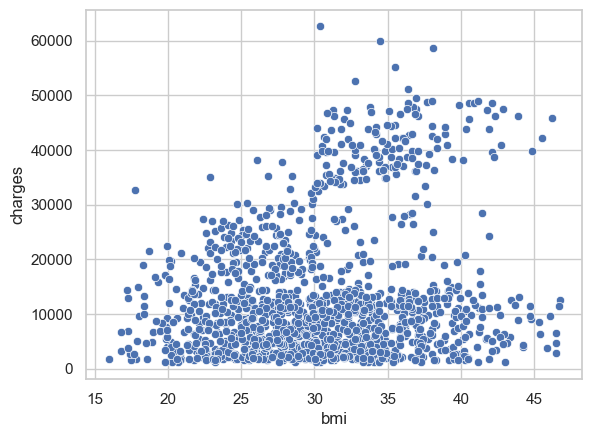

In [92]:
#Correlation b/w bmi and charges.
corr_bmi_charges=sns.scatterplot(x="bmi", y="charges", data=data_cleaned)

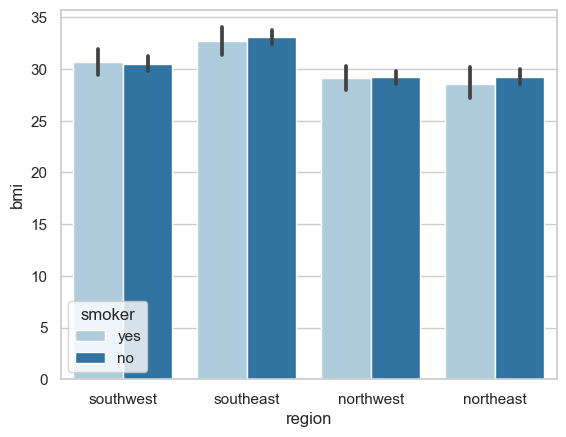

In [93]:
#Correlation b/w region,smoker and bmi.
corr_region_smoker_bmi=sns.barplot(x="region", y="bmi", hue="smoker", data=data_cleaned,palette="Paired")


<AxesSubplot:>

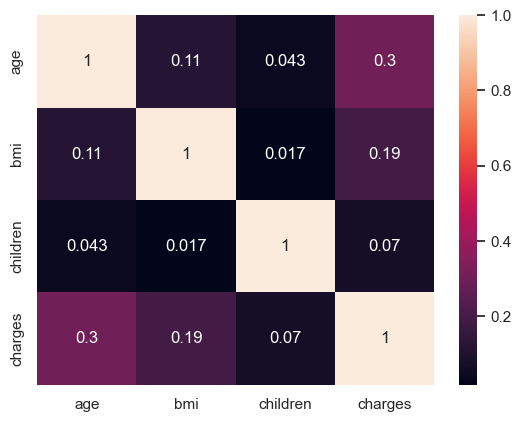

In [94]:
sns.heatmap(data_cleaned.corr(), annot= True)

# One-Hot Encoding Technique

1)One-Hot Encoding technique is used when there are categorical features which are not integer values inthe dataset
2)One-Hot Encoding creates columns for each value of the categorical features
3)All the smoker values with no answer are represented as 1 in the smoker_no column, & the rest are represented as 0

There are three categorical features that are needed to be encoded:
    Sex
    Smoker
    Region
    

In [95]:
#One-Hot Encoding Via using get_dummies.
data_encoded = pd.get_dummies(data_cleaned, columns=["sex", "smoker", "region"])
data_encoded.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [96]:
data_encoded.corr()
data_cleaned.corr()

,age,bmi,children,charges
age,1.000000,0.114686,0.043041,0.302022
bmi,0.114686,1.000000,0.017355,0.193196
children,0.043041,0.017355,1.000000,0.069739
charges,0.302022,0.193196,0.069739,1.000000


Train and Test Data

* To create train and test data,train_test_split method is used.
* 70-30 ratio is used.In other words, the training dataset has 70% of the dataset and the test dataset has the 30% of the dataset

In [97]:
X=data_encoded.drop("charges", axis=1)
y=data_encoded.loc[:, "charges"]

#Split the dataset into train and test sets with 70-30 ratio.
X_train, X_test , y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size=0.3)

In [98]:
#Convert y_train and y_test to pandas DataFrame.
y_train = y_train.to_frame()
y_test = y_test.to_frame()

In [106]:
#Check all of the data are pandas DataFrame.
print(f"X_train type: {type(X_train)}\nX_test type:{type(X_test)}\ny_train type:{type(y_train)}\ny_test type: {type(y_test)}")

X_train type: <class 'pandas.core.frame.DataFrame'>
X_test type:<class 'pandas.core.frame.DataFrame'>
y_train type:<class 'pandas.core.frame.DataFrame'>
y_test type: <class 'pandas.core.frame.DataFrame'>


Scaling the Dataset
* Data Points can be far away from eachother
* Scaling is used to make data points closer to each other
* Data points become more generalized by being closer

In [108]:
# Scale dataset to normalize.
scaler_func=MinMaxScaler()
data_list=["X_train","X_test", "y_train","y_test"]
data_list_index=0
for index in [X_train,X_test,y_train,y_test]:
    scaler_func.fit_transform(index)
    print(f"Min {data_list[data_list_index]}:", scaler_func.data_min_)
    print(f"Max {data_list[data_list_index]}:", scaler_func.data_max_)
    data_list_index += 1

Min X_train: [18.   15.96  0.    0.    0.    0.    0.    0.    0.    0.    0.  ]
Max X_train: [64.  46.7  5.   1.   1.   1.   1.   1.   1.   1.   1. ]
Min X_test: [18.    16.815  0.     0.     0.     0.     0.     0.     0.     0.
  0.   ]
Max X_test: [64.   46.75  5.    1.    1.    1.    1.    1.    1.    1.    1.  ]
Min y_train: [1131.5066]
Max y_train: [58571.07448]
Min y_test: [1121.8739]
Max y_test: [62592.87309]


Model Selection and Performance Comparsion

In [109]:
#Create an object using the LinearRegression() class.
linear_regression_model = LinearRegression()
decision_tree_model = DecisionTreeRegressor(max_depth=3)
random_forest_model = RandomForestRegressor(max_depth=4, n_estimators=500)
gradient_boosting_model = GradientBoostingRegressor(max_depth=3, n_estimators=100, learning_rate=.2)
ada_boost_regressor_model = AdaBoostRegressor(n_estimators=50, learning_rate=.01)

In [110]:
#create a list that contains the regression models.
regression_models = [("Linear Regression", linear_regression_model),
                    ("Decision Tree", decision_tree_model),
                    ("Random Forest", random_forest_model),
                    ("Gradient Boosting", gradient_boosting_model),
                    ("Ada Boost Regressor", ada_boost_regressor_model)]

In [111]:
#Create a list that contains r2 scores of models
r2_scores = []

In [112]:
#Create a for loop to check cross validation scores of the regression of models.
for regression_name, regression_model in regression_models:
    cross_validation_scores = cross_val_score(regression_model, X_train,y_train.values.ravel(), scoring="r2")
    r2_scores.append(cross_validation_scores.mean()*100)
    
    print(f"r2 score of {regression_name}: ", str(round(sum(cross_validation_scores)/5*100,4)), "%\n")


r2 score of Linear Regression:  74.001 %

r2 score of Decision Tree:  84.923 %

r2 score of Random Forest:  86.4426 %

r2 score of Gradient Boosting:  84.6076 %

r2 score of Ada Boost Regressor:  85.5337 %



Best Performing Model:Random Forest

# Hyper-parameter optimization

In [113]:
#create a new random forest model

best_model_rand_forest = RandomForestRegressor()
rand_forest_parameters = [{"max_depth": [2,3,4,5,6],
                          "n_estimators":[400,500,600]}]
rand_forest_gridCV = GridSearchCV(best_model_rand_forest,
                                 rand_forest_parameters,
                                 cv = 5,
                                 n_jobs = -1)

#Train the model
rand_forest_gridCV.fit(X_train,y_train.values.ravel())
#Get the best parameters for Random Forest Regressor
print(rand_forest_gridCV.best_params_)
print(rand_forest_gridCV.best_score_)

{'max_depth': 4, 'n_estimators': 600}
0.8643832857241271


Results of Hyper-Parameter Optimization

The best parameters of Random Forest Regressor:
    
    * max_depth:4
    * n_esimators:600
        
The best score of the Random Forest Regressor:
    *0.8643832857241271


Evaluate these results by using the best parameters found by using Hyper-Parameter Optimization

In [117]:
RMSE=cross_val_score( RandomForestRegressor(max_depth = 4, n_estimators = 600), X_train, y_train.values.ravel() ,cv=5,scoring="neg_mean_squared_error")
print("Mean Square Error Of XGBoost:", (RMSE, 3))
RMAE=cross_val_score( RandomForestRegressor(max_depth = 4, n_estimators = 600), X_train, y_train.values.ravel() ,cv=5,scoring="neg_mean_absolute_error")
print("Mean Absolute Error Of XGBoost:", (RMAE, 3))
r2=cross_val_score( RandomForestRegressor(max_depth = 4, n_estimators = 600), X_train, y_train.values.ravel() ,cv=5,scoring="r2").mean()
print("r2 Score Of XGBoost:", str(round(r2*100,4))+"%\n")

Mean Square Error Of XGBoost: (array([-20015845.68250772, -25384612.94932795, -14519016.28196676,
       -17343227.82980374, -14803021.35921253]), 3)
Mean Absolute Error Of XGBoost: (array([-2327.88195037, -2801.74096668, -2041.0982231 , -2405.26527455,
       -2330.50064682]), 3)
r2 Score Of XGBoost: 86.4228%

